In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

os.chdir(os.getcwd())

from utils import get_processed_df
from utils import read_data
from utils import calculate_growth_rates
from utils import get_lagged_variables
from utils import give_sliding_window_volatility
from utils import add_systemic_risk_dummy
from utils import add_missing_variables
from utils import add_systemic_risk_dummy_with_df
from utils import plot_target_variables
from utils import plot_all_variables

In [2]:
COUNTRY = 'DE'
FILE = './data/data_input_quarterly.csv'
TIME_INTERVALL = "quarterly"

yoy_variables = ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]
lag2_variables = [f"{col}_yoy" for col in ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]]
lag1_variables = [f"{col}_yoy" for col in ["cpi"]]

df = read_data(FILE, COUNTRY)
df = give_sliding_window_volatility(df, 4, "fx")
df = calculate_growth_rates(df, yoy_variables)
df = df.drop(yoy_variables, axis=1)
df = get_lagged_variables(df, 2, lag2_variables)
df = df.drop(lag2_variables, axis=1)
df = get_lagged_variables(df, 1, lag1_variables)
df = df.drop(lag1_variables, axis=1)
df = add_missing_variables(df, COUNTRY)
df['financialStressIndex_movingAverage'] = df['financialStressIndex'].rolling(12).mean()
df_dummies = pd.read_csv('dummy_final.csv')
df = add_systemic_risk_dummy_with_df(df, df_dummies, COUNTRY)

#df = get_processed_df(df, COUNTRY,TIME_INTERVALL, verbose=True)

subselect dummy in field
found dummy country list


c:\git\eu_sdfa_forecastingTools\utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_country['date'] = pd.to_datetime(dummy_country['date.1'])
c:\git\eu_sdfa_forecastingTools\utils.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [3]:
df

,date,resPropPrice,fx,dsrPnfs,dsrHousehold,dsrNfc,policyRate,UStermSpread,financialStressIndex,fx_std,...,totalCreditPnfs2GDP_yoy_L1,bankCreditPnfs_yoy_L2,totalCreditPnfsLCY_yoy_L2,totalCreditPnfs2GDP_yoy_L2,cpi_yoy_L1,financialConditionIndex,EAtermspread,USpolicyRate,financialStressIndex_movingAverage,is_systemic_crisis
0,1948-07-01,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1948-10-01,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1949-01-01,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1949-04-01,NaN,NaN,NaN,NaN,NaN,4.803191,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1949-07-01,NaN,NaN,NaN,NaN,NaN,4.068421,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2023-07-01,130.4867,0.918989,10.8,5.8,23.8,4.186869,-0.767385,0.09910,0.059093,...,-2.570093,3.796500,4.438107,-2.244582,6.796917,0.017891,-0.406586,5.304293,0.146312,0.0
301,2023-10-01,127.8242,0.930387,10.8,5.8,23.9,4.500000,-0.357656,0.05938,0.014406,...,-4.559505,5.781684,3.869408,-2.570093,5.832606,-0.154502,-0.281729,5.375000,0.143258,0.0
302,2024-01-01,125.7567,0.921022,NaN,NaN,NaN,4.500000,-0.326349,0.03750,0.011041,...,-4.761905,5.119403,1.900999,-4.559505,3.648422,-0.512822,-0.344808,5.375000,0.142820,0.0
303,2024-04-01,NaN,0.928794,NaN,NaN,NaN,4.446809,-0.376923,0.03455,0.011267,...,NaN,2.525136,1.439710,-4.761905,2.519272,NaN,-0.344277,5.375000,0.143771,0.0


In [4]:
cols2reg = ['policyRate', 'resPropPrice', 'cpi_yoy', 'fx', 'financialStressIndex', 
'bankCreditPnfs_growthRate','totalCreditPnfsLCY_growthRate', 'totalCreditPnfs2GDP_growthRate',
 'fx_std', 'is_systemic_crisis', 'EAtermspread', 'USpolicyRate', 'UStermSpread']

df.set_index(pd.to_datetime(df['date']), inplace = True, drop = True)
df.drop(['date'], axis = 1, inplace = True)

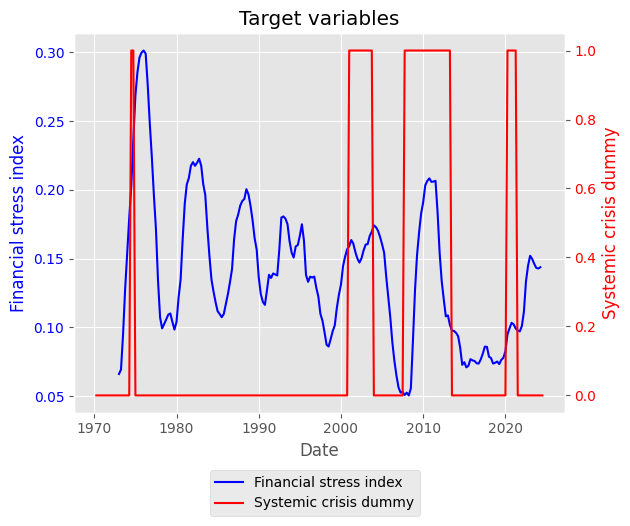

In [5]:
plot_target_variables(df)

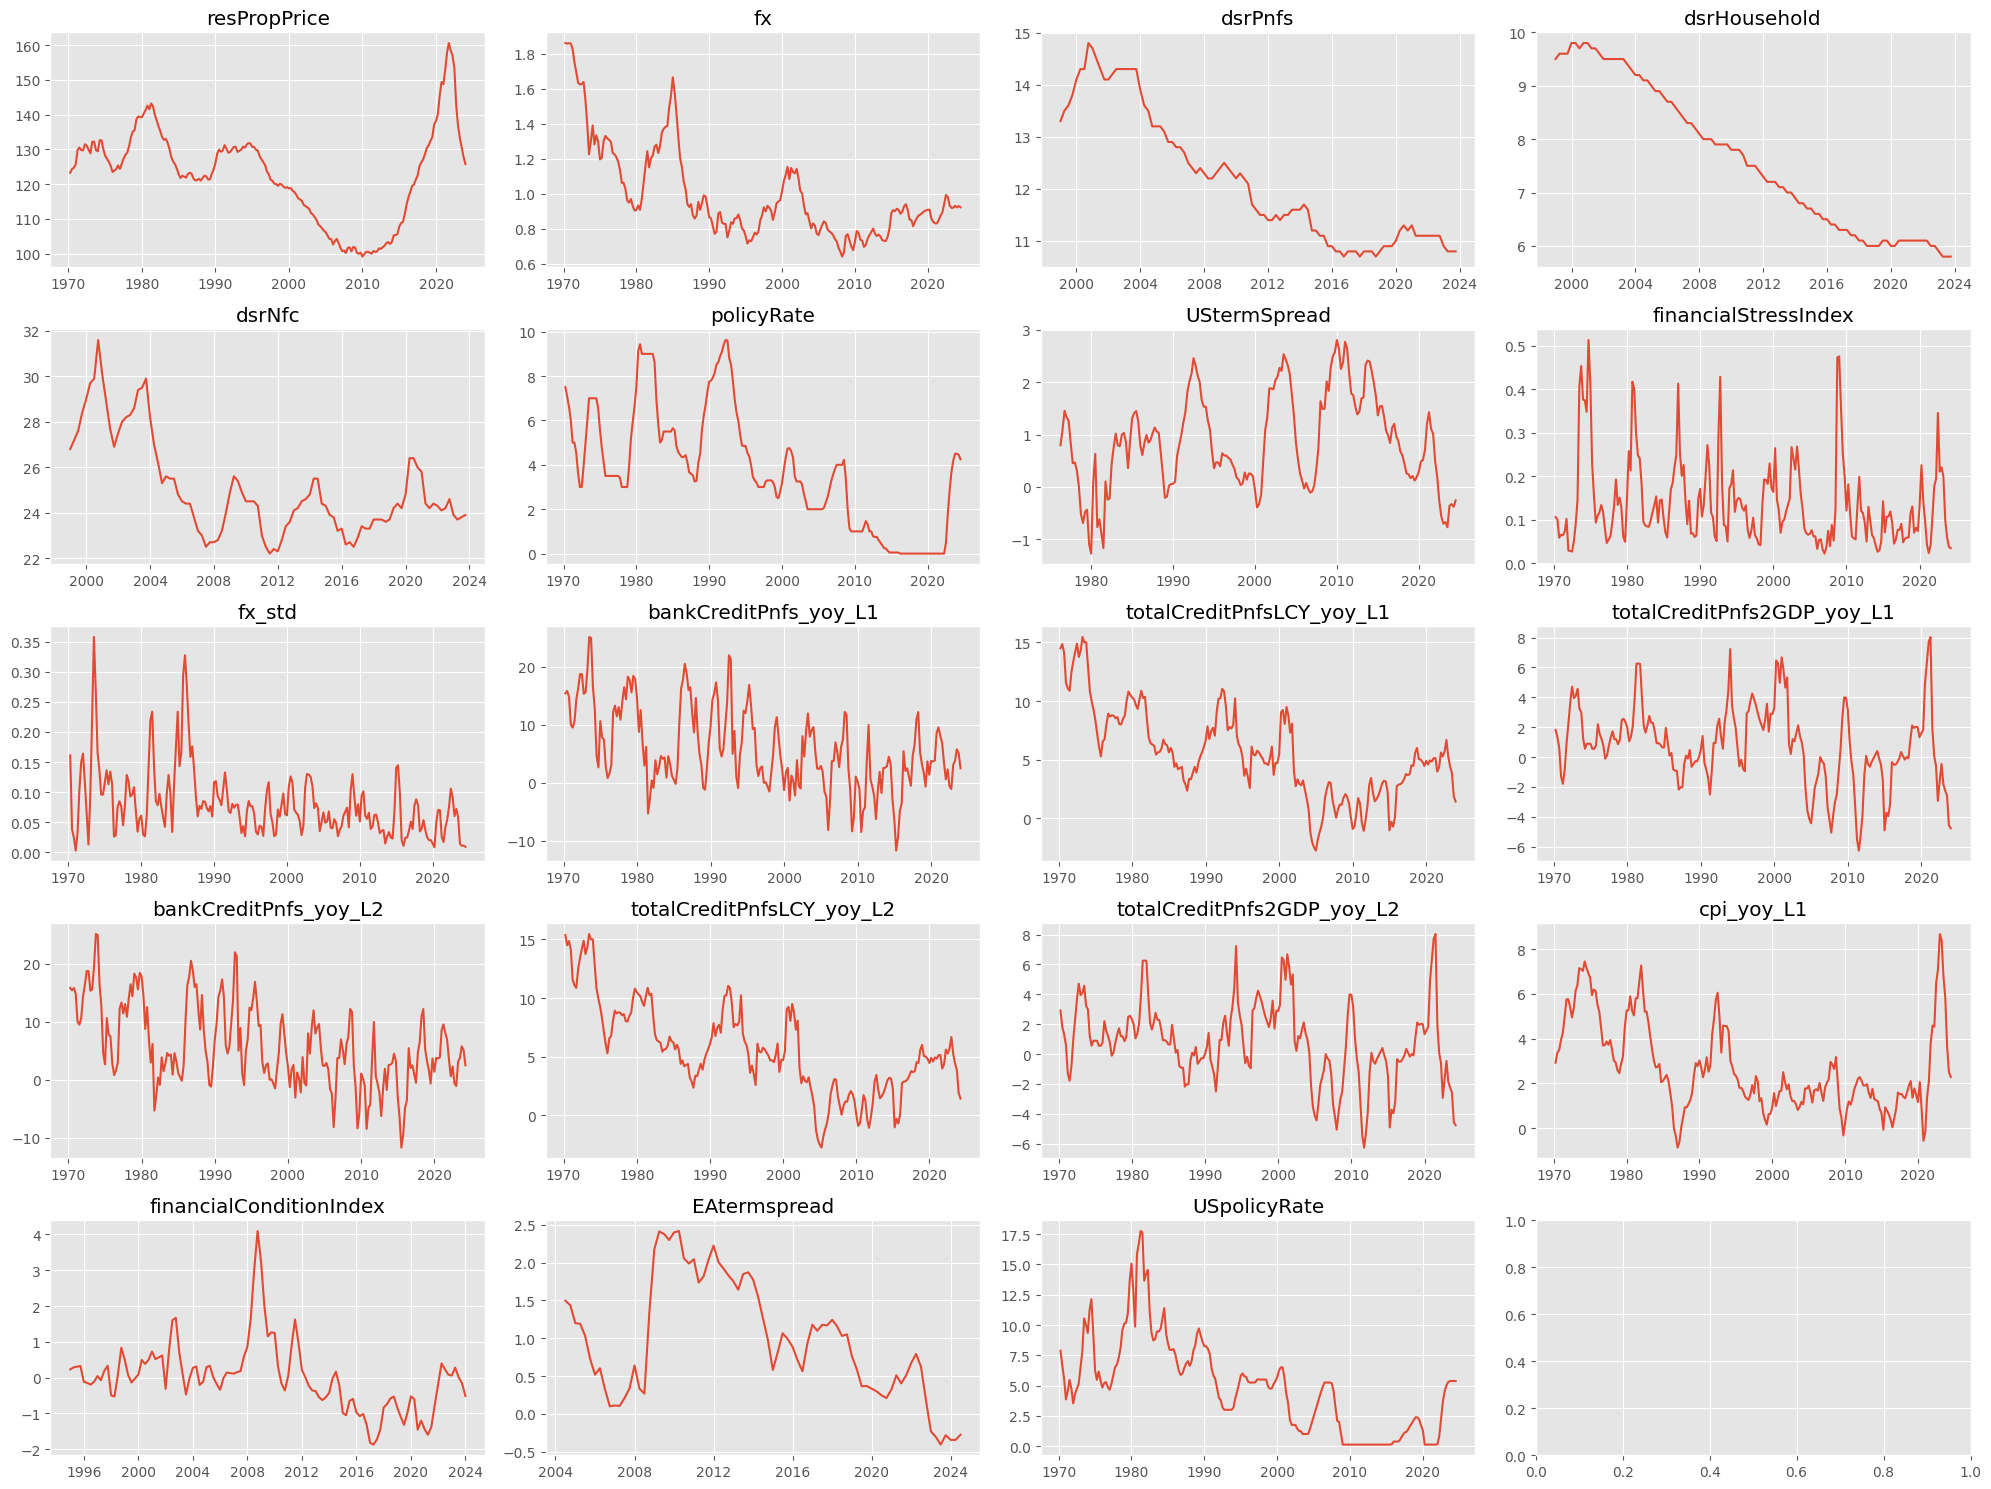

In [6]:
plot_all_variables(df)

In [9]:
df = df[df.index>'1970']
df.head()

,resPropPrice,fx,dsrPnfs,dsrHousehold,dsrNfc,policyRate,UStermSpread,financialStressIndex,fx_std,bankCreditPnfs_yoy_L1,...,totalCreditPnfs2GDP_yoy_L1,bankCreditPnfs_yoy_L2,totalCreditPnfsLCY_yoy_L2,totalCreditPnfs2GDP_yoy_L2,cpi_yoy_L1,financialConditionIndex,EAtermspread,USpolicyRate,financialStressIndex_movingAverage,is_systemic_crisis
date,,,,,,,,,,,,,,,,,,,,,
1970-04-01,123.2700,1.860088,NaN,NaN,NaN,7.500000,NaN,0.10604,0.161265,15.414753,...,1.822600,15.841755,15.365390,2.916160,2.929191,NaN,NaN,7.882755,NaN,0.0
1970-07-01,124.3391,1.856615,NaN,NaN,NaN,7.085859,NaN,0.10064,0.038282,15.830040,...,1.334951,15.414753,14.502976,1.822600,3.368295,NaN,NaN,6.698687,NaN,0.0
1970-10-01,124.7134,1.858916,NaN,NaN,NaN,6.616162,NaN,0.05876,0.024770,14.827194,...,0.607533,15.830040,14.855307,1.334951,3.503313,NaN,NaN,5.577475,NaN,0.0
1971-01-01,125.7255,1.857594,NaN,NaN,NaN,6.000000,NaN,0.06502,0.003036,9.975039,...,-1.298701,14.827194,14.103921,0.607533,3.945319,NaN,NaN,3.850825,NaN,0.0
1971-04-01,129.8377,1.826105,NaN,NaN,NaN,5.000000,NaN,0.06414,0.031660,9.517005,...,-1.789976,9.975039,11.554189,-1.298701,4.267882,NaN,NaN,4.551020,NaN,0.0


In [10]:
df.to_csv('./data/data_processed_quaterly_DE.csv')